In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import time

c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans++ time: 1.011702060699463 n_iter:  7 distance:  2.8747564387649565
kmeans rand index:  0.815060637690859


c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


minibatch kmeans++ time:,0.5462377071380615,n_steps: ,14,distance: ,2.8799213305671567
minibatch rand index:  0.8018859070775665
kmeans center: [[0.50479557 0.33897749]
 [1.97625681 2.95135092]]
minibatch kmeans center: [[0.64712247 0.34797272]
 [1.94244019 2.98999235]]


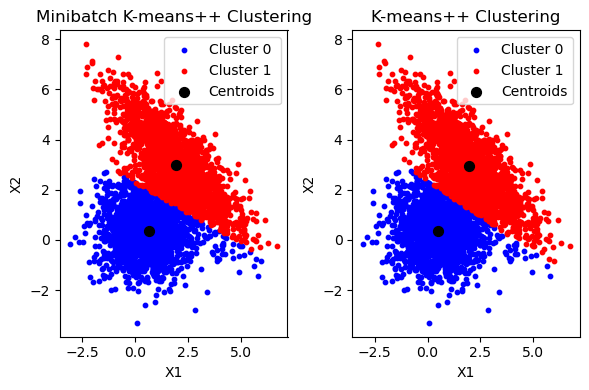

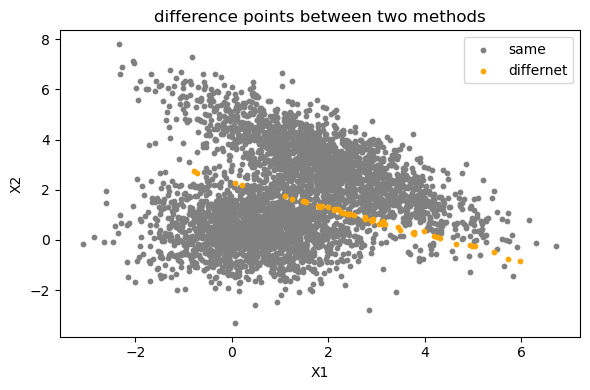

In [8]:
# load dataset
data = pd.read_csv("dataset/Engytime.csv")

# extract values
X = data[['X1', 'X2']]
num_row = X.shape[0]

# Initialize kmeans++ model
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter= 50, random_state=42)

# Run model
start = time.time()
kmeans.fit(X)
end = time.time()

#Print the running time of kmeans++
print('kmeans++ time:', end-start,'n_iter: ',kmeans.n_iter_,'distance: ',kmeans.inertia_/num_row,sep = ' ')

# get the result of clustering
kmeans_labels = kmeans.labels_
print('kmeans rand index: ', adjusted_rand_score(kmeans_labels,data['Class']))
data['Cluster_kmeans++'] = kmeans_labels

#minibatch kmeans++
minibatchkmeans = MiniBatchKMeans(n_clusters=2, init='k-means++',max_iter= 50, batch_size=100 ,random_state=42)

start = time.time()
minibatchkmeans.fit(X)
end = time.time()
print('minibatch kmeans++ time:', end-start,'n_steps: ',minibatchkmeans.n_steps_,'distance: ',minibatchkmeans.inertia_/num_row,sep = ',')

minibatch_labels = minibatchkmeans.labels_
print('minibatch rand index: ', adjusted_rand_score(minibatch_labels,data['Class']))
data['Cluster_minibatch'] = minibatch_labels


# Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

colors = ['blue', 'red'] 
centers_kmeans = kmeans.cluster_centers_
print('kmeans center:', centers_kmeans, sep=' ')
centers_minibatch = minibatchkmeans.cluster_centers_
print('minibatch kmeans center:', centers_minibatch, sep=' ')

for cluster in range(2):
    cluster_data = data[data['Cluster_minibatch'] == cluster]
    axes[0].scatter(cluster_data['X1'], cluster_data['X2'], c=colors[cluster], label=f'Cluster {cluster}', s=10)
axes[0].scatter(centers_minibatch[:, 0], centers_minibatch[:, 1], marker='o', c='black', label='Centroids', s = 50)
axes[0].set_title('Minibatch K-means++ Clustering')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].legend()


for cluster in range(2):
    cluster_data = data[data['Cluster_kmeans++'] == cluster]
    axes[1].scatter(cluster_data['X1'], cluster_data['X2'], c=colors[cluster], label=f'Cluster {cluster}', s=10)
axes[1].scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], marker='o', c='black', label='Centroids', s = 50)
axes[1].set_title('K-means++ Clustering')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].legend()

plt.tight_layout()
plt.savefig('Figure/Engytime.png')
plt.show()

# Highlight different points
data['difference'] = (data['Cluster_minibatch'] == data['Cluster_kmeans++']).astype(int)
color_difference = ['orange', 'grey']
con = ['differnet','same']
plt.figure(figsize=(6,4))
for difference in range(1,-1,-1):
    cluster_data = data[data['difference'] == difference]
    plt.scatter(cluster_data['X1'], cluster_data['X2'], c=color_difference[difference], label=con[difference], s=10)
plt.title('difference points between two methods')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()


plt.tight_layout()
plt.savefig('Figure/engytime_difference.png')
plt.show()


c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


kmeans++ time: 0.9647750854492188 n_iter:  3 distance:  0.3615827353998366
kmeans rand index:  1.0


c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\R14\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


minibatch kmeans++ time:,0.5618329048156738,n_steps: ,17,distance: ,0.3621357643462797
minibatch rand index:  1.0
kmeans center: [[ 1.00437010e+00  4.42225250e-03]
 [ 3.08408723e+00 -2.05580000e-03]]
minibatch kmeans center: [[ 1.02947385 -0.00899996]
 [ 3.09306851 -0.01672005]]


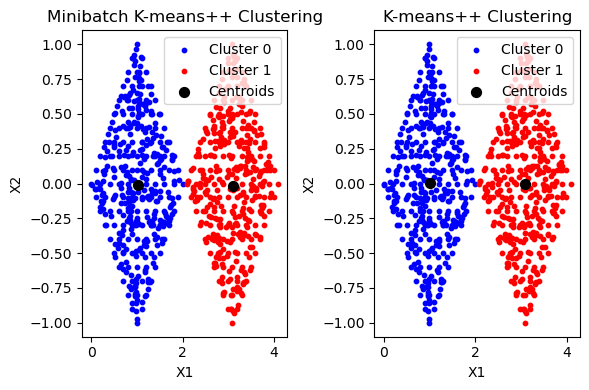

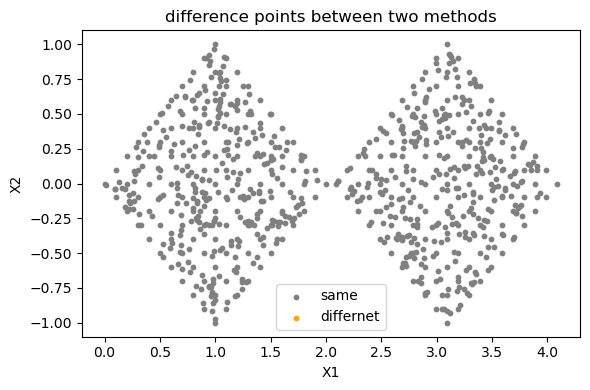

In [9]:
# load dataset
data = pd.read_csv("dataset/TwoDiamonds.csv")

# extract values
X = data[['X1', 'X2']]
num_row = X.shape[0]

# Initialize kmeans++ model
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter= 50, random_state=42)

# Run model
start = time.time()
kmeans.fit(X)
end = time.time()

#Print the running time of kmeans++
print('kmeans++ time:', end-start,'n_iter: ',kmeans.n_iter_,'distance: ',kmeans.inertia_/num_row,sep = ' ')

# get the result of clustering
kmeans_labels = kmeans.labels_
print('kmeans rand index: ', adjusted_rand_score(kmeans_labels,data['Class']))
data['Cluster_kmeans++'] = kmeans_labels

#minibatch kmeans++
minibatchkmeans = MiniBatchKMeans(n_clusters=2, init='k-means++',max_iter= 50, batch_size=100 ,random_state=42)

start = time.time()
minibatchkmeans.fit(X)
end = time.time()
print('minibatch kmeans++ time:', end-start,'n_steps: ',minibatchkmeans.n_steps_,'distance: ',minibatchkmeans.inertia_/num_row,sep = ',')

minibatch_labels = minibatchkmeans.labels_
print('minibatch rand index: ', adjusted_rand_score(minibatch_labels,data['Class']))
data['Cluster_minibatch'] = minibatch_labels


# Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

colors = ['blue', 'red'] 
centers_kmeans = kmeans.cluster_centers_
print('kmeans center:', centers_kmeans, sep=' ')
centers_minibatch = minibatchkmeans.cluster_centers_
print('minibatch kmeans center:', centers_minibatch, sep=' ')

for cluster in range(2):
    cluster_data = data[data['Cluster_minibatch'] == cluster]
    axes[0].scatter(cluster_data['X1'], cluster_data['X2'], c=colors[cluster], label=f'Cluster {cluster}', s=10)
axes[0].scatter(centers_minibatch[:, 0], centers_minibatch[:, 1], marker='o', c='black', label='Centroids', s = 50)
axes[0].set_title('Minibatch K-means++ Clustering')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].legend()


for cluster in range(2):
    cluster_data = data[data['Cluster_kmeans++'] == cluster]
    axes[1].scatter(cluster_data['X1'], cluster_data['X2'], c=colors[cluster], label=f'Cluster {cluster}', s=10)
axes[1].scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], marker='o', c='black', label='Centroids', s = 50)
axes[1].set_title('K-means++ Clustering')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].legend()

plt.tight_layout()
plt.savefig('Figure/TwoDiamonds.png')
plt.show()

# Highlight different points
data['difference'] = (data['Cluster_minibatch'] == data['Cluster_kmeans++']).astype(int)
color_difference = ['orange', 'grey']
con = ['differnet','same']
plt.figure(figsize=(6,4))
for difference in range(1,-1,-1):
    cluster_data = data[data['difference'] == difference]
    plt.scatter(cluster_data['X1'], cluster_data['X2'], c=color_difference[difference], label=con[difference], s=10)
plt.title('difference points between two methods')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()


plt.tight_layout()
plt.savefig('Figure/twodiamonds_difference.png')
plt.show()

